Task 1
Student Score Prediction with Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



-----------------------------------------------------------------------------
STEP 1: Data Generation and Initial Exploration
-----------------------------------------------------------------------------
Since we don't have access to the specific Kaggle dataset, we'll create a synthetic
dataset that simulates student performance data.
This dataset includes 'study_hours', 'sleep_hours', and 'exam_score'.

Set a random seed for reproducibility

In [2]:
np.random.seed(42)

Generate synthetic data

In [3]:
n_students = 100
study_hours = np.random.uniform(1, 10, n_students).round(1)
sleep_hours = np.random.uniform(5, 9, n_students).round(1)
# The exam score is based on study hours, with some random noise
exam_score = (study_hours * 8) + (sleep_hours * 2) + np.random.normal(0, 10, n_students)
exam_score = np.clip(exam_score, 0, 100).astype(int)


Create a Pandas DataFrame

In [4]:
data = pd.DataFrame({
    'study_hours': study_hours,
    'sleep_hours': sleep_hours,
    'exam_score': exam_score
})

print("First 5 rows of the generated dataset:")
print(data.head())
print("\nDataset Info:")
data.info()

First 5 rows of the generated dataset:
   study_hours  sleep_hours  exam_score
0          4.4          5.1          38
1          9.6          7.5          94
2          7.6          6.3          76
3          6.4          7.0          58
4          2.4          8.6          55

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  100 non-null    float64
 1   sleep_hours  100 non-null    float64
 2   exam_score   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


isnull is a good command to check for missing values.

In [5]:
data.isnull().sum()


,0
study_hours,0
sleep_hours,0
exam_score,0



-----------------------------------------------------------------------------
# STEP 2: Data Cleaning and Basic Visualization
ship between 'study_hours' and 'exam_score'.
This helps us understand if a linear relationship exists.

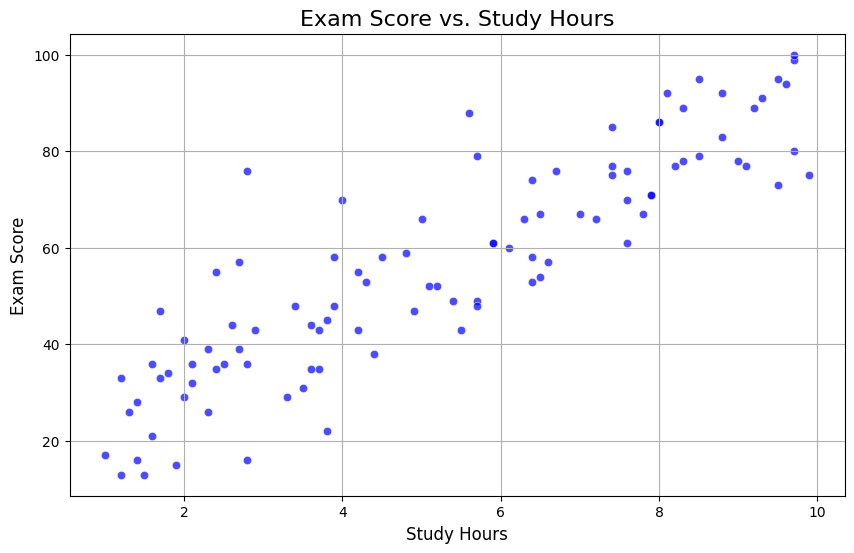

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='exam_score', data=data, color='blue', alpha=0.7)
plt.title('Exam Score vs. Study Hours', fontsize=16)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True)
plt.show()


-----------------------------------------------------------------------------
STEP 3: Split the Dataset into Training and Testing Sets
-----------------------------------------------------------------------------
Define the features (X) and the target variable (y).
We'll start by using only 'study_hours' as our feature.

In [7]:
features = ['study_hours']
X = data[features]
y = data['exam_score']

Split the data. We'll use 80% for training and 20% for testing.
The `random_state` ensures that we get the same split every time we run the code.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 80 samples
Testing set size: 20 samples


-----------------------------------------------------------------------------
STEP 4: Train a Linear Regression Model
-----------------------------------------------------------------------------
Create an instance of the LinearRegression model

In [9]:
linear_model = LinearRegression()


Train the model using the training data

In [10]:
linear_model.fit(X_train, y_train)

LinearRegression()

Print the model's coefficients and intercept

In [11]:
print("\nLinear Regression Model Parameters:")
print(f"Coefficient (slope): {linear_model.coef_[0]:.2f}")
print(f"Intercept: {linear_model.intercept_:.2f}")


Linear Regression Model Parameters:
Coefficient (slope): 7.58
Intercept: 16.41


The equation for our model is: exam_score = (slope) * study_hours + intercept


-----------------------------------------------------------------------------
STEP 5: Visualize Predictions and Evaluate Model Performance
-----------------------------------------------------------------------------
Make predictions on the test set

In [12]:
y_pred = linear_model.predict(X_test)

Visualize the predictions against the actual values

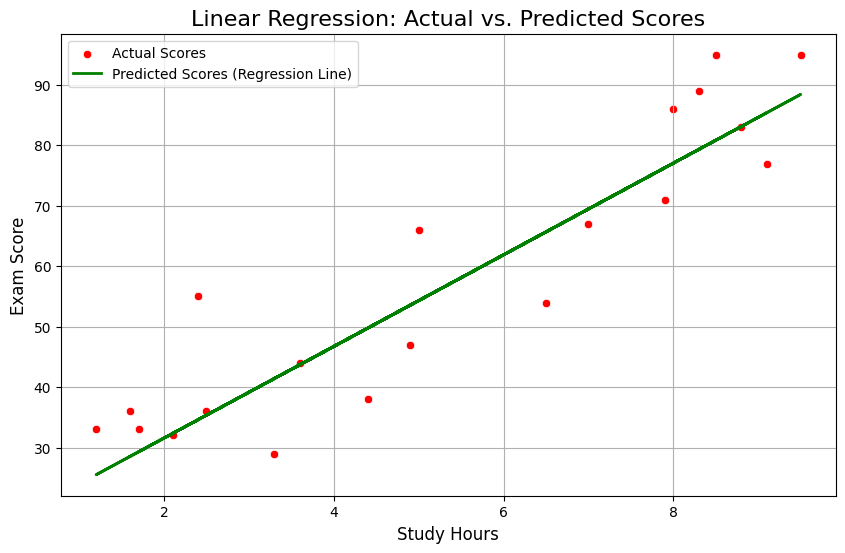

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['study_hours'], y=y_test, color='red', label='Actual Scores')
plt.plot(X_test['study_hours'], y_pred, color='green', linewidth=2, label='Predicted Scores (Regression Line)')
plt.title('Linear Regression: Actual vs. Predicted Scores', fontsize=16)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

 Evaluate the model's performance using metrics

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [15]:
print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 7.50
Mean Squared Error (MSE): 83.64
R-squared Score: 0.84


-----------------------------------------------------------------------------
BONUS: Try Polynomial Regression and Compare Performance
-----------------------------------------------------------------------------
Linear regression assumes a straight-line relationship. What if the relationship
is curved? We can try polynomial regression to fit a curve to the data.

Create a pipeline that first transforms the data to polynomial features and then
fits a linear regression model.
Let's use a polynomial of degree 2

In [16]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

Fit the polynomial model to the training data

In [17]:
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Make predictions on the test set

In [18]:
y_poly_pred = poly_model.predict(X_test)


Evaluate the polynomial model

In [21]:
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print("\nPolynomial Regression (Degree 2) Model Evaluation:")
print(f"Mean Absolute Error (MAE): {poly_mae:.2f}")
print(f"Mean Squared Error (MSE): {poly_mse:.2f}")
print(f"R-squared Score: {poly_r2:.2f}")


Polynomial Regression (Degree 2) Model Evaluation:
Mean Absolute Error (MAE): 8.04
Mean Squared Error (MSE): 92.15
R-squared Score: 0.82


Plot both the linear and polynomial regression lines for comparison

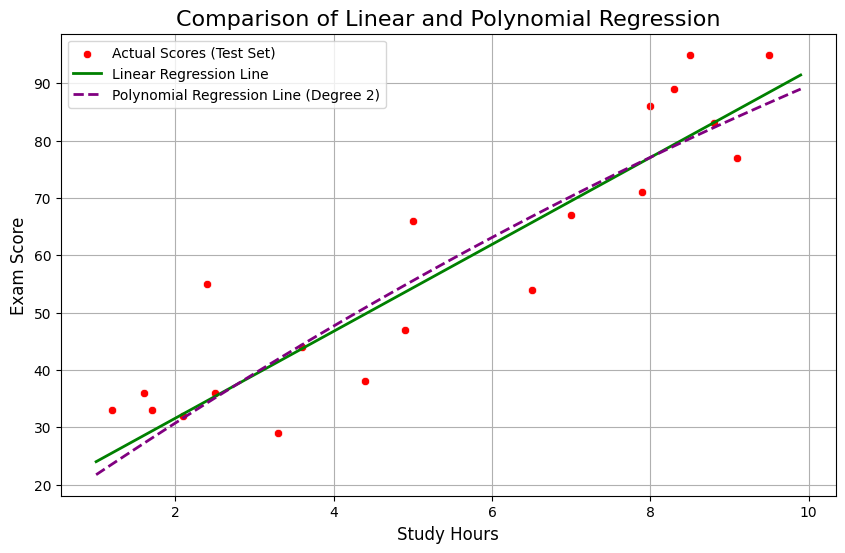

In [26]:
X_plot = pd.DataFrame(np.linspace(X['study_hours'].min(), X['study_hours'].max(), 100).reshape(-1, 1),
                      columns=['study_hours'])

y_plot_linear = linear_model.predict(X_plot)
y_plot_poly = poly_model.predict(X_plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['study_hours'], y=y_test, color='red', label='Actual Scores (Test Set)')
plt.plot(X_plot['study_hours'], y_plot_linear, color='green', linewidth=2, label='Linear Regression Line')
plt.plot(X_plot['study_hours'], y_plot_poly, color='purple', linewidth=2, linestyle='--', label='Polynomial Regression Line (Degree 2)')
plt.title('Comparison of Linear and Polynomial Regression', fontsize=16)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

-----------------------------------------------------------------------------
BONUS: Experimenting with different feature combinations
-----------------------------------------------------------------------------
Let's try to improve the model by adding 'sleep_hours' as an additional feature.
We'll go back to a linear model for this demonstration.
Define the new set of features

In [22]:
features_with_sleep = ['study_hours', 'sleep_hours']
X_new = data[features_with_sleep]
y_new = data['exam_score']

Split the new data

In [23]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


Train a new linear regression model

In [24]:
multi_feature_model = LinearRegression()
multi_feature_model.fit(X_train_new, y_train_new)

LinearRegression()

Make predictions and evaluate the new model

In [25]:
y_pred_new = multi_feature_model.predict(X_test_new)
new_r2 = r2_score(y_test_new, y_pred_new)

print("\nMulti-Feature Linear Regression Model Evaluation (with study and sleep hours):")
print(f"R-squared Score: {new_r2:.2f}")


Multi-Feature Linear Regression Model Evaluation (with study and sleep hours):
R-squared Score: 0.87



You can see that by adding a relevant feature, the R-squared score might improve,
indicating a better fit to the data.


Task 1 (Full Code)

First 5 rows of the generated dataset:
   study_hours  sleep_hours  exam_score
0          4.4          5.1          38
1          9.6          7.5          94
2          7.6          6.3          76
3          6.4          7.0          58
4          2.4          8.6          55

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  100 non-null    float64
 1   sleep_hours  100 non-null    float64
 2   exam_score   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


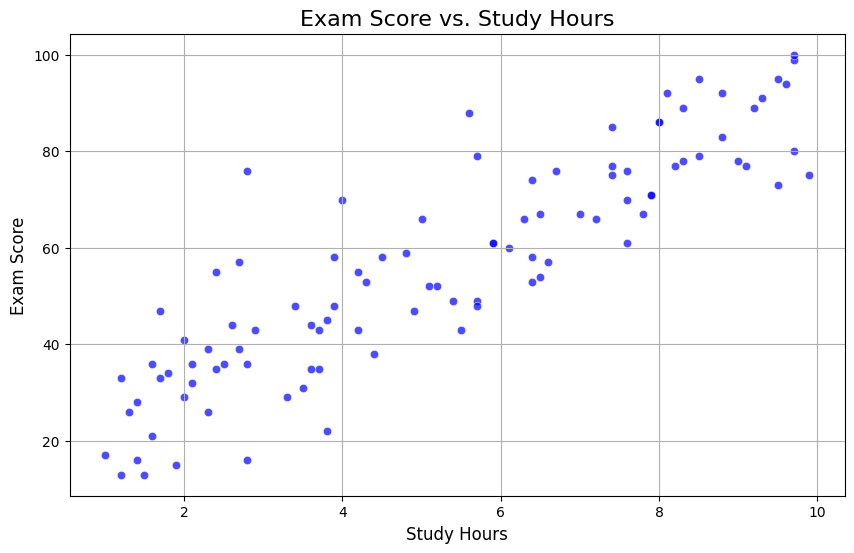


Training set size: 80 samples
Testing set size: 20 samples

Linear Regression Model Parameters:
Coefficient (slope): 7.58
Intercept: 16.41


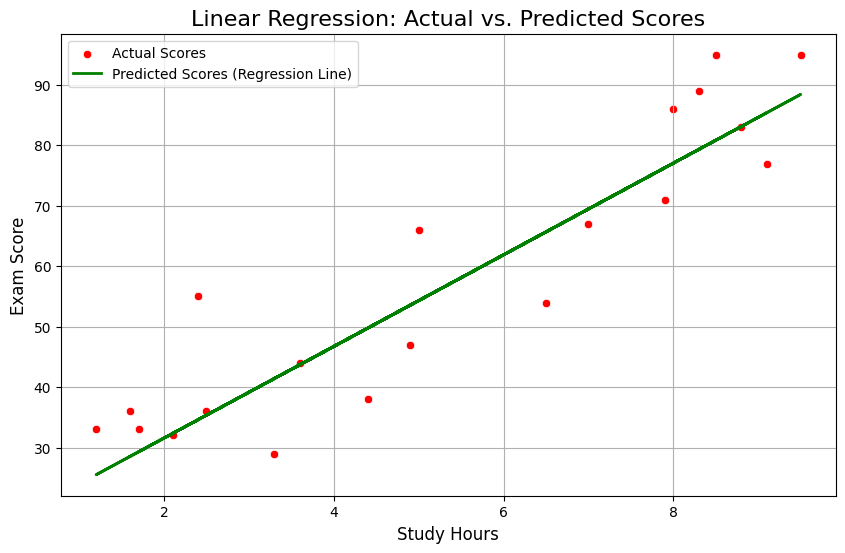


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 7.50
Mean Squared Error (MSE): 83.64
R-squared Score: 0.84

Polynomial Regression (Degree 2) Model Evaluation:
Mean Absolute Error (MAE): 8.04
Mean Squared Error (MSE): 92.15
R-squared Score: 0.82


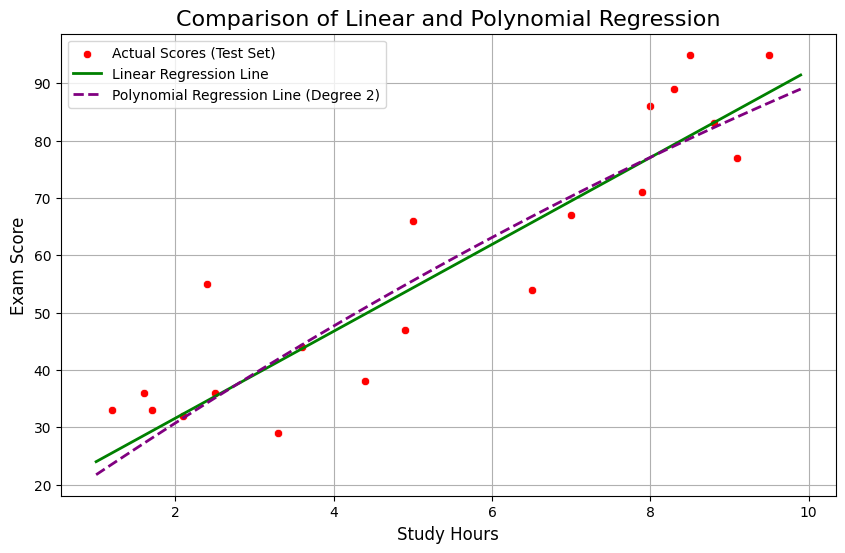


Multi-Feature Linear Regression Model Evaluation (with study and sleep hours):
R-squared Score: 0.87


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

n_students = 100
study_hours = np.random.uniform(1, 10, n_students).round(1)
sleep_hours = np.random.uniform(5, 9, n_students).round(1)
exam_score = (study_hours * 8) + (sleep_hours * 2) + np.random.normal(0, 10, n_students)
exam_score = np.clip(exam_score, 0, 100).astype(int)

data = pd.DataFrame({
    'study_hours': study_hours,
    'sleep_hours': sleep_hours,
    'exam_score': exam_score
})

print("First 5 rows of the generated dataset:")
print(data.head())
print("\nDataset Info:")
data.info()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='exam_score', data=data, color='blue', alpha=0.7)
plt.title('Exam Score vs. Study Hours', fontsize=16)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True)
plt.show()

features = ['study_hours']
X = data[features]
y = data['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

print("\nLinear Regression Model Parameters:")
print(f"Coefficient (slope): {linear_model.coef_[0]:.2f}")
print(f"Intercept: {linear_model.intercept_:.2f}")

y_pred = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['study_hours'], y=y_test, color='red', label='Actual Scores')
plt.plot(X_test['study_hours'], y_pred, color='green', linewidth=2, label='Predicted Scores (Regression Line)')
plt.title('Linear Regression: Actual vs. Predicted Scores', fontsize=16)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

poly_model.fit(X_train, y_train)

y_poly_pred = poly_model.predict(X_test)

poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)

print("\nPolynomial Regression (Degree 2) Model Evaluation:")
print(f"Mean Absolute Error (MAE): {poly_mae:.2f}")
print(f"Mean Squared Error (MSE): {poly_mse:.2f}")
print(f"R-squared Score: {poly_r2:.2f}")


X_plot = pd.DataFrame(np.linspace(X['study_hours'].min(), X['study_hours'].max(), 100).reshape(-1, 1),
                      columns=['study_hours'])

y_plot_linear = linear_model.predict(X_plot)
y_plot_poly = poly_model.predict(X_plot)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['study_hours'], y=y_test, color='red', label='Actual Scores (Test Set)')
plt.plot(X_plot['study_hours'], y_plot_linear, color='green', linewidth=2, label='Linear Regression Line')
plt.plot(X_plot['study_hours'], y_plot_poly, color='purple', linewidth=2, linestyle='--', label='Polynomial Regression Line (Degree 2)')
plt.title('Comparison of Linear and Polynomial Regression', fontsize=16)
plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

features_with_sleep = ['study_hours', 'sleep_hours']
X_new = data[features_with_sleep]
y_new = data['exam_score']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

multi_feature_model = LinearRegression()
multi_feature_model.fit(X_train_new, y_train_new)

y_pred_new = multi_feature_model.predict(X_test_new)
new_r2 = r2_score(y_test_new, y_pred_new)

print("\nMulti-Feature Linear Regression Model Evaluation (with study and sleep hours):")
print(f"R-squared Score: {new_r2:.2f}")


Task 2: Customer Segmentation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


-----------------------------------------------------------------------------
STEP 1: Data Generation and Initial Exploration
-----------------------------------------------------------------------------
Since we don't have access to the specific Kaggle dataset, we'll create a synthetic
dataset that simulates mall customer data with clear clusters.

In [30]:
np.random.seed(42)


Generate synthetic data points for 5 distinct clusters

In [31]:
cluster_1 = np.random.randn(50, 2) * [10, 10] + [25, 80]  # High spending, low income
cluster_2 = np.random.randn(50, 2) * [15, 10] + [85, 80]  # High spending, high income
cluster_3 = np.random.randn(50, 2) * [10, 5] + [50, 50]   # Average
cluster_4 = np.random.randn(50, 2) * [15, 10] + [25, 20]  # Low spending, low income
cluster_5 = np.random.randn(50, 2) * [10, 5] + [85, 20]   # Low spending, high income


Combine the clusters into a single DataFrame

In [32]:
customer_data = np.concatenate((cluster_1, cluster_2, cluster_3, cluster_4, cluster_5), axis=0)
data = pd.DataFrame(customer_data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
data['CustomerID'] = range(1, len(data) + 1)
data = data[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("First 5 rows of the generated dataset:")
print(data.head())
print("\nDataset Info:")
data.info()


First 5 rows of the generated dataset:
   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1           29.967142               78.617357
1           2           31.476885               95.230299
2           3           22.658466               77.658630
3           4           40.792128               87.674347
4           5           20.305256               85.425600

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              250 non-null    int64  
 1   Annual Income (k$)      250 non-null    float64
 2   Spending Score (1-100)  250 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.0 KB


Let's select the features we will use for clustering

In [33]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

Visualize the unscaled data to see initial groupings

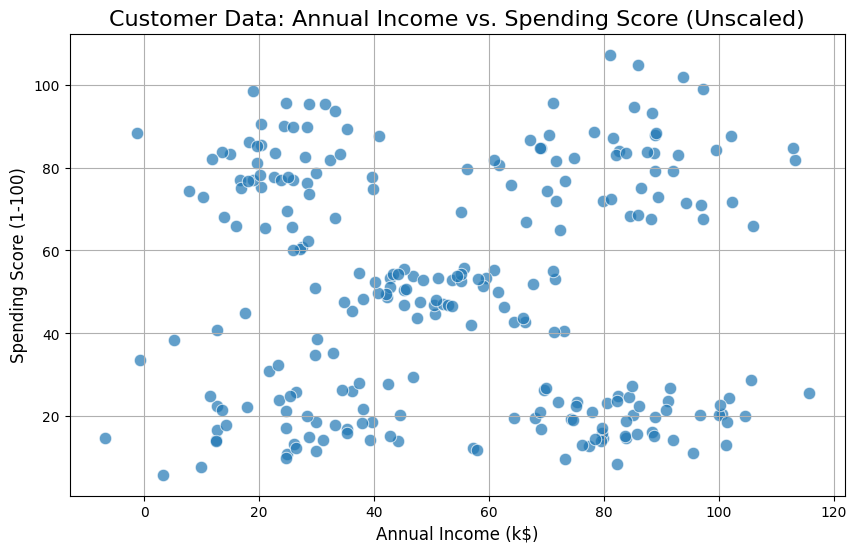

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s=80, alpha=0.7)
plt.title('Customer Data: Annual Income vs. Spending Score (Unscaled)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.show()

-----------------------------------------------------------------------------
STEP 2: Perform Scaling
-----------------------------------------------------------------------------
K-Means is a distance-based algorithm, so scaling the features is crucial.
Features with larger magnitudes will have a disproportionate effect on the distance
calculation. We use StandardScaler to normalize the data.


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled Data (first 5 rows):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())



Scaled Data (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0           -0.833121                1.012355
1           -0.780911                1.604383
2           -1.085872                0.978189
3           -0.458767                1.335115
4           -1.167252                1.254977


-----------------------------------------------------------------------------
STEP 3: Determine Optimal Number of Clusters (Elbow Method)
-----------------------------------------------------------------------------
We use the Elbow Method to find the ideal number of clusters (k).
We plot the Within-Cluster Sum of Squares (WCSS) for a range of k values.
The 'elbow' in the plot is usually the optimal k.

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Plot the WCSS values against the number of clusters

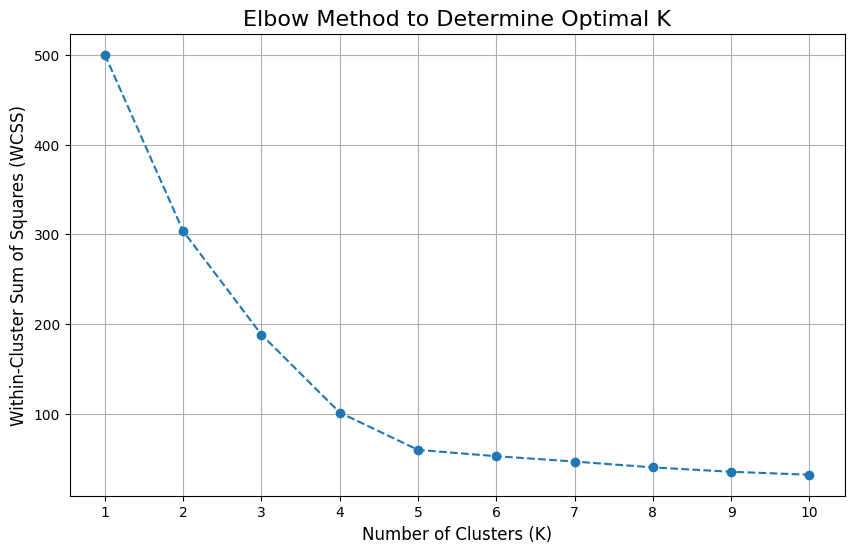

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

From the plot, we can see a distinct "elbow" at k=5. This suggests that 5 is the optimal
number of clusters for this dataset.


-----------------------------------------------------------------------------
STEP 4: Apply K-Means Clustering and Visualize Clusters
-----------------------------------------------------------------------------
Now we apply K-Means with our determined optimal number of clusters, k=5.


In [38]:

optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)


Fit the model and get the cluster labels

In [39]:
y_kmeans = kmeans_final.fit_predict(X_scaled)

Add the cluster labels to our original data DataFrame

In [40]:
data['Cluster'] = y_kmeans

Get the cluster centroids (the centers of each cluster)

In [41]:
centroids_scaled = kmeans_final.cluster_centers_

 We need to inverse transform the centroids to plot them on the original scale

In [42]:
centroids = scaler.inverse_transform(centroids_scaled)

Visualize the clusters on the original data scale

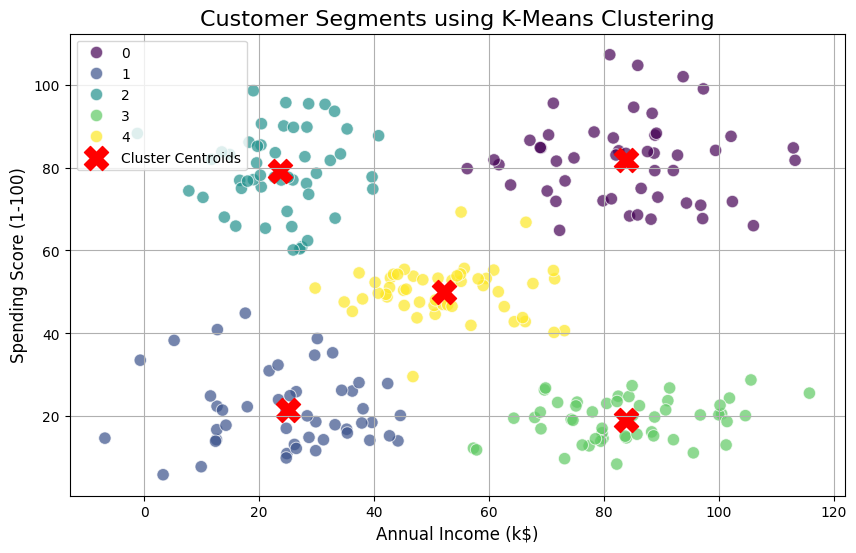

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data,
                palette='viridis', s=80, alpha=0.7, legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Cluster Centroids')
plt.title('Customer Segments using K-Means Clustering', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


-----------------------------------------------------------------------------
BONUS 1: Try a Different Clustering Algorithm (DBSCAN)
-----------------------------------------------------------------------------
DBSCAN is a density-based algorithm that finds core samples of high density
and expands clusters from those samples. It's great for finding non-globular shapes.


We need to choose the `eps` (maximum distance between two samples for them to be considered
as in the same neighborhood) and `min_samples` (the number of samples in a neighborhood
for a point to be considered as a core point).

In [44]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

data['DBSCAN_Cluster'] = clusters_dbscan


Visualize the DBSCAN clusters

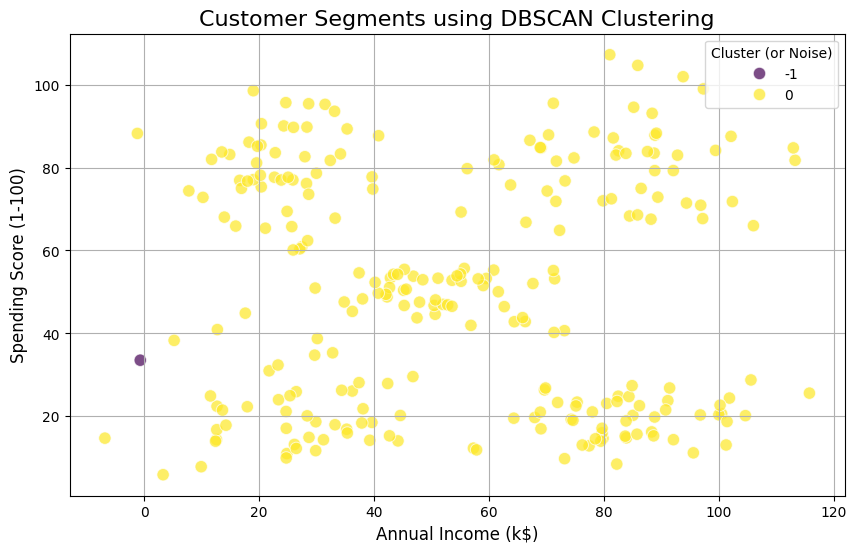

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=data,
                palette='viridis', s=80, alpha=0.7, legend='full')
plt.title('Customer Segments using DBSCAN Clustering', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster (or Noise)')
plt.grid(True)
plt.show()

Note: DBSCAN assigns a cluster label of -1 to noise points that don't belong to any cluster.

-----------------------------------------------------------------------------
BONUS 2: Analyze Average Spending Per Cluster
-----------------------------------------------------------------------------
Let's analyze the characteristics of the clusters we found with K-Means.


In [46]:

cluster_analysis = data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'CustomerID': 'count'
})

print("\nAnalysis of K-Means Clusters:")
print(cluster_analysis)


Analysis of K-Means Clusters:
        Annual Income (k$)                        Spending Score (1-100)  \
                      mean        min         max                   mean   
Cluster                                                                    
0                83.917645  56.218432  113.292789              81.698686   
1                25.027884  -6.858436   44.582182              21.543887   
2                23.643244  -1.197451   40.792128              79.279826   
3                83.826020  57.297737  115.788808              19.218023   
4                52.158803  29.748574   73.146586              50.033755   

                               CustomerID  
               min         max      count  
Cluster                                    
0        64.851528  107.201692         49  
1         5.925362   44.878062         48  
2        60.124311   98.522782         50  
3         8.490394   28.776704         52  
4        29.592708   69.263657         51  


Based on the analysis, we can give names to the clusters:
Cluster 0: High income, Low spending
Cluster 1: Average income, Average spending
Cluster 2: Low income, High spending
Cluster 3: Low income, Low spending
Cluster 4: High income, High spending

Task 2 (Full Code)

First 5 rows of the generated dataset:
   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1           29.967142               78.617357
1           2           31.476885               95.230299
2           3           22.658466               77.658630
3           4           40.792128               87.674347
4           5           20.305256               85.425600

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              250 non-null    int64  
 1   Annual Income (k$)      250 non-null    float64
 2   Spending Score (1-100)  250 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.0 KB


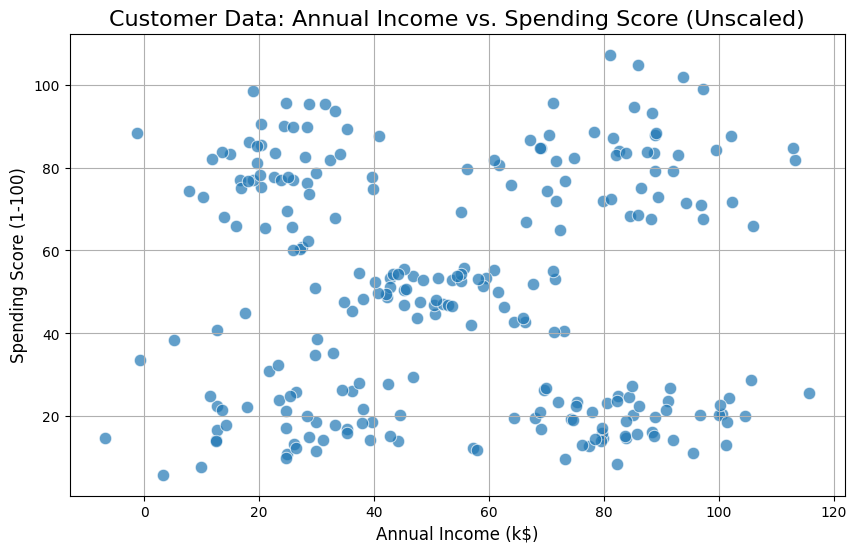


Scaled Data (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0           -0.833121                1.012355
1           -0.780911                1.604383
2           -1.085872                0.978189
3           -0.458767                1.335115
4           -1.167252                1.254977


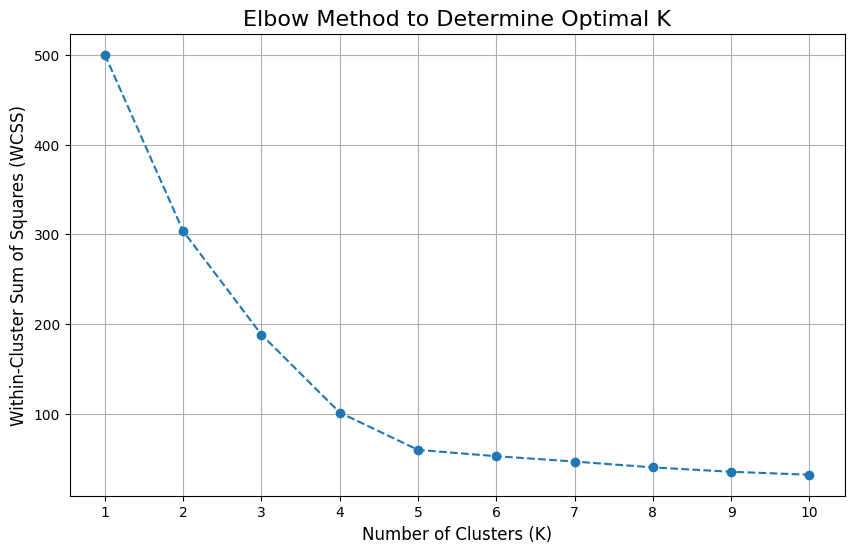

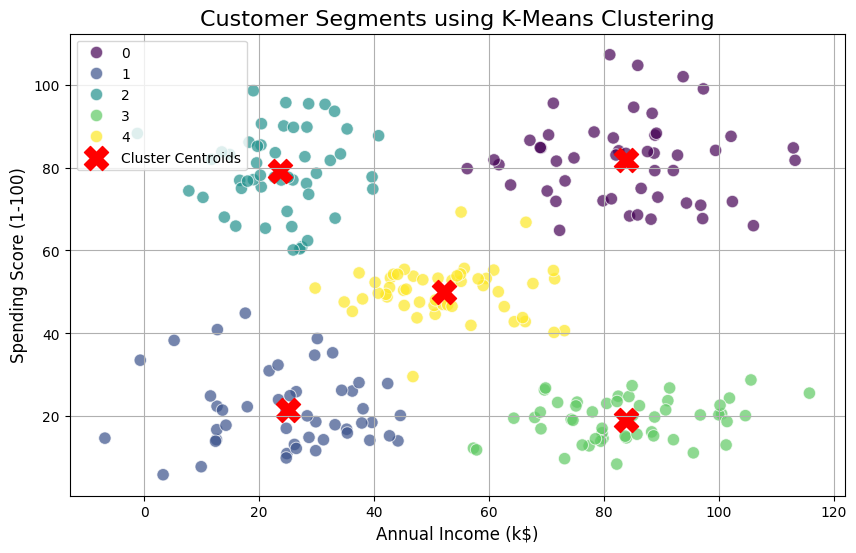

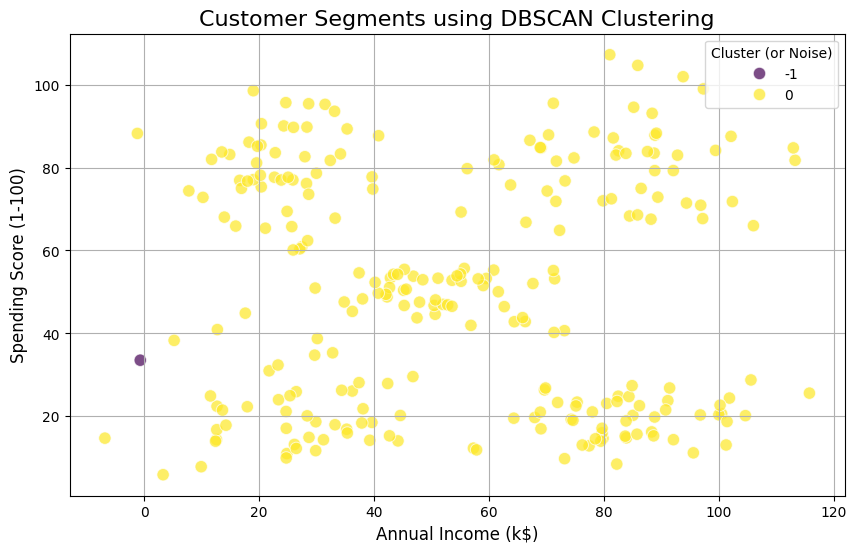


Analysis of K-Means Clusters:
        Annual Income (k$)                        Spending Score (1-100)  \
                      mean        min         max                   mean   
Cluster                                                                    
0                83.917645  56.218432  113.292789              81.698686   
1                25.027884  -6.858436   44.582182              21.543887   
2                23.643244  -1.197451   40.792128              79.279826   
3                83.826020  57.297737  115.788808              19.218023   
4                52.158803  29.748574   73.146586              50.033755   

                               CustomerID  
               min         max      count  
Cluster                                    
0        64.851528  107.201692         49  
1         5.925362   44.878062         48  
2        60.124311   98.522782         50  
3         8.490394   28.776704         52  
4        29.592708   69.263657         51  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

np.random.seed(42)

cluster_1 = np.random.randn(50, 2) * [10, 10] + [25, 80]
cluster_2 = np.random.randn(50, 2) * [15, 10] + [85, 80]
cluster_3 = np.random.randn(50, 2) * [10, 5] + [50, 50]
cluster_4 = np.random.randn(50, 2) * [15, 10] + [25, 20]
cluster_5 = np.random.randn(50, 2) * [10, 5] + [85, 20]

customer_data = np.concatenate((cluster_1, cluster_2, cluster_3, cluster_4, cluster_5), axis=0)
data = pd.DataFrame(customer_data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
data['CustomerID'] = range(1, len(data) + 1)
data = data[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("First 5 rows of the generated dataset:")
print(data.head())
print("\nDataset Info:")
data.info()

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, s=80, alpha=0.7)
plt.title('Customer Data: Annual Income vs. Spending Score (Unscaled)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nScaled Data (first 5 rows):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans_final.fit_predict(X_scaled)

data['Cluster'] = y_kmeans

centroids_scaled = kmeans_final.cluster_centers_

centroids = scaler.inverse_transform(centroids_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data,
                palette='viridis', s=80, alpha=0.7, legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Cluster Centroids')
plt.title('Customer Segments using K-Means Clustering', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

data['DBSCAN_Cluster'] = clusters_dbscan

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=data,
                palette='viridis', s=80, alpha=0.7, legend='full')
plt.title('Customer Segments using DBSCAN Clustering', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster (or Noise)')
plt.grid(True)
plt.show()

cluster_analysis = data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'CustomerID': 'count'
})

print("\nAnalysis of K-Means Clusters:")
print(cluster_analysis)
